## **BTLD Input Shape setting**

데이터 불러오기

In [4]:
import tensorflow as tf
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
file = '/content/drive/MyDrive/Colab Notebooks/MSC/BTLD 시계열 데이터 예측/ch23_24_19_20_25.csv'
BTLDdata = pd.read_csv(file, encoding='cp949')
BTLDdata.isnull().any()

Mounted at /content/drive


Date                             False
A23                              False
B23                              False
C23                              False
D23                              False
Unnamed: 5                        True
A24                              False
B24                              False
C24                              False
D24                              False
Unnamed: 10                       True
A19                              False
B19                              False
C19                              False
D19                              False
Unnamed: 15                       True
A20                              False
B20                              False
C20                              False
D20                              False
Unnamed: 20                       True
A25                              False
B25                              False
C25                              False
D25                              False
Unnamed: 25              

In [5]:
#plot 설정
mpl.rcParams['figure.figsize'] = (12, 8)
mpl.rcParams['axes.grid'] = False
plt.rc('font', size=20)        # 기본 폰트 크기
plt.rc('axes', labelsize=15)   # x,y축 label 폰트 크기
plt.rc('xtick', labelsize=15)  # x축 눈금 폰트 크기 
plt.rc('ytick', labelsize=15)  # y축 눈금 폰트 크기
plt.rc('legend', fontsize=15)  # 범례 폰트 크기
plt.rc('figure', titlesize=20) #제목


#채널별 데이터 추출
Rawdata=BTLDdata.set_index('Date')
ch23 = Rawdata.iloc[:, [0,1,2,3,25,26,27,28,29,30,31,32,33,34]]
ch24 = Rawdata.iloc[:,[5,6,7,8,25,26,27,28,29,30,31,32,33,34]]
ch19 = Rawdata.iloc[:,[10,11,12,13,25,26,27,28,29,30,31,32,33,34]]
ch20 = Rawdata.iloc[:,[15,16,17,18,25,26,27,28,29,30,31,32,33,34]]
ch25 = Rawdata.iloc[:,[20,21,22,23,25,26,27,28,29,30,31,32,33,34]]
#print(ch23.head(),ch24.head(),ch19.head(),ch20.head(),ch25.head())

#주파수 대역별 데이터 추출
A = Rawdata.iloc[:,[0,5,10,15,20,25,26,27,28,29,30,31,32,33,34]]
B = Rawdata.iloc[:,[1,6,11,16,21,25,26,27,28,29,30,31,32,33,34]]
C = Rawdata.iloc[:,[2,7,12,17,22,25,26,27,28,29,30,31,32,33,34]]
D = Rawdata.iloc[:,[3,8,13,18,23,25,26,27,28,29,30,31,32,33,34]]
#print(A.head(),B.head(),C.head(),D.head())

print('0-30kHz일때 채널 및 영향인자:', A.shape)
print('30-60kHz일때 채널 및 영향인자:', B.shape)
print('60-90kHz일때 채널 및 영향인자:', C.shape)
print('90-200kHz일때 채널 및 영향인자:', D.shape)

0-30kHz일때 채널 및 영향인자: (2832, 15)
30-60kHz일때 채널 및 영향인자: (2832, 15)
60-90kHz일때 채널 및 영향인자: (2832, 15)
90-200kHz일때 채널 및 영향인자: (2832, 15)


주파수 대역 설정

In [6]:
#예측하고자 하는 주파수 대역
df = C

#예측하고자하는 특정 채널에서의 해당 주파수
frequency=Rawdata.iloc[:,[2]]
# A=0, B=1, C=2, D=3

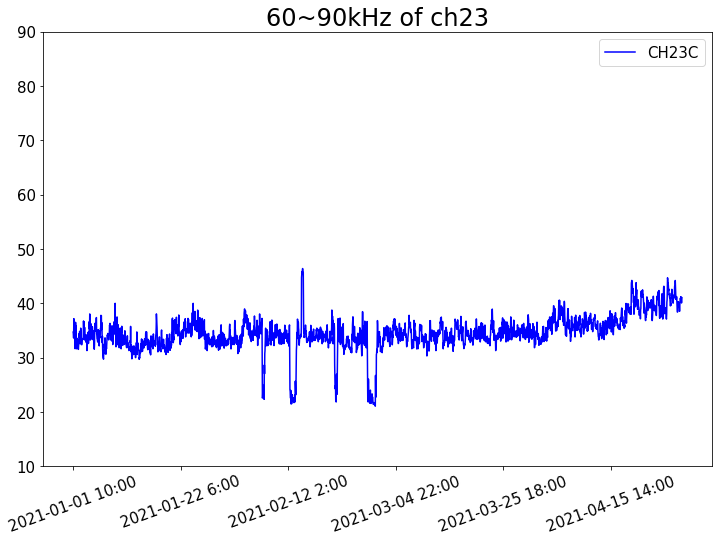

In [8]:
plt.plot(frequency, color='b', label='CH23C') #주파수에 따라 label 바꿔주기
plt.xticks([0,500, 1000, 1500, 2000, 2500])
plt.xticks(rotation=20)
plt.ylim(10,90)
plt.title("60~90kHz of ch23")
plt.legend()
plt.show()

정규화 이전의 그래프

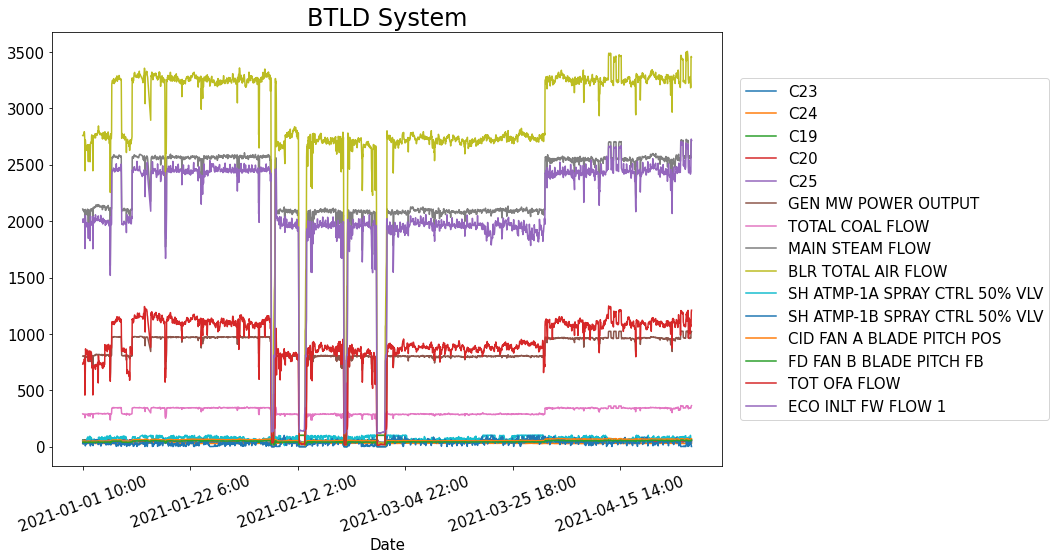

In [9]:
df.plot(subplots=False)
#plt.xticks(rotation=45)
plt.title("BTLD System")
plt.xticks(rotation=20)
plt.legend(loc='center right', bbox_to_anchor=(1.5, 0.5))
plt.show()

데이터 정규화(MinMaxScaler) 및 시각화

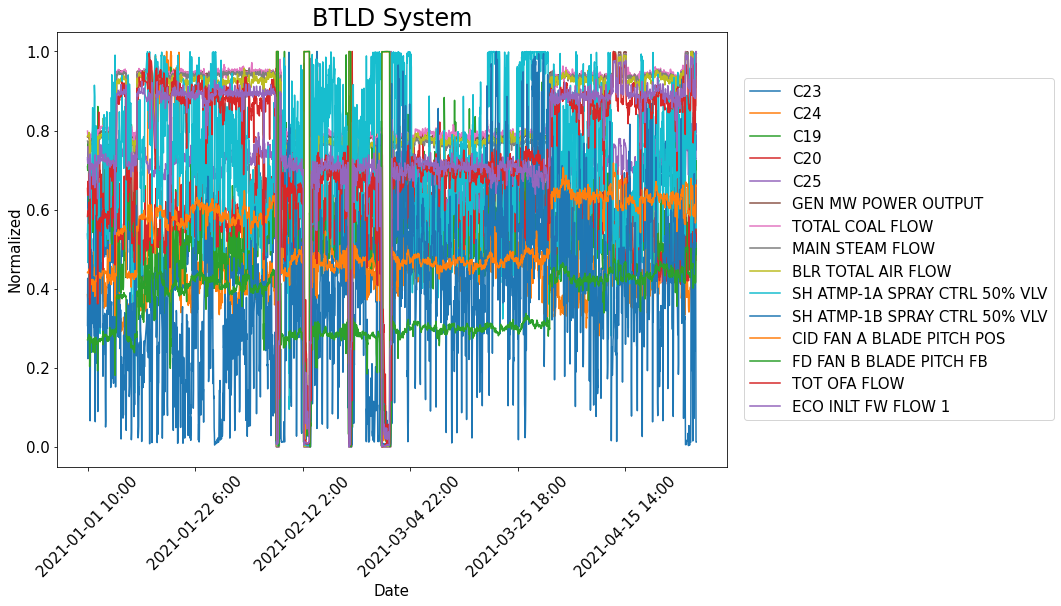

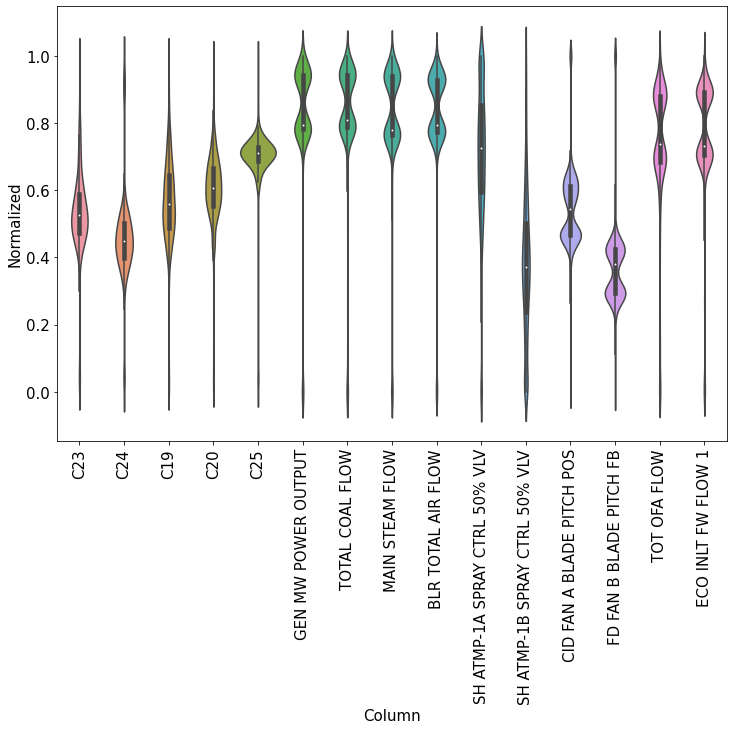

In [10]:
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

scaler = MinMaxScaler()
df_s = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_s)
df_scaled.columns=df.columns
df_scaled.index=Rawdata.index

df_scaled.plot(subplots=False, title='BTLD System', ylabel='Normalized', xlabel='Date')
plt.xticks(rotation=45)
plt.legend(loc='center right', bbox_to_anchor=(1.5, 0.5))
plt.show()

df_scaled_g = df_scaled.melt(var_name='Column', value_name='Normalized')
ax = sns.violinplot(x='Column', y='Normalized', data=df_scaled_g)
_ = ax.set_xticklabels(df.keys(), rotation=90)

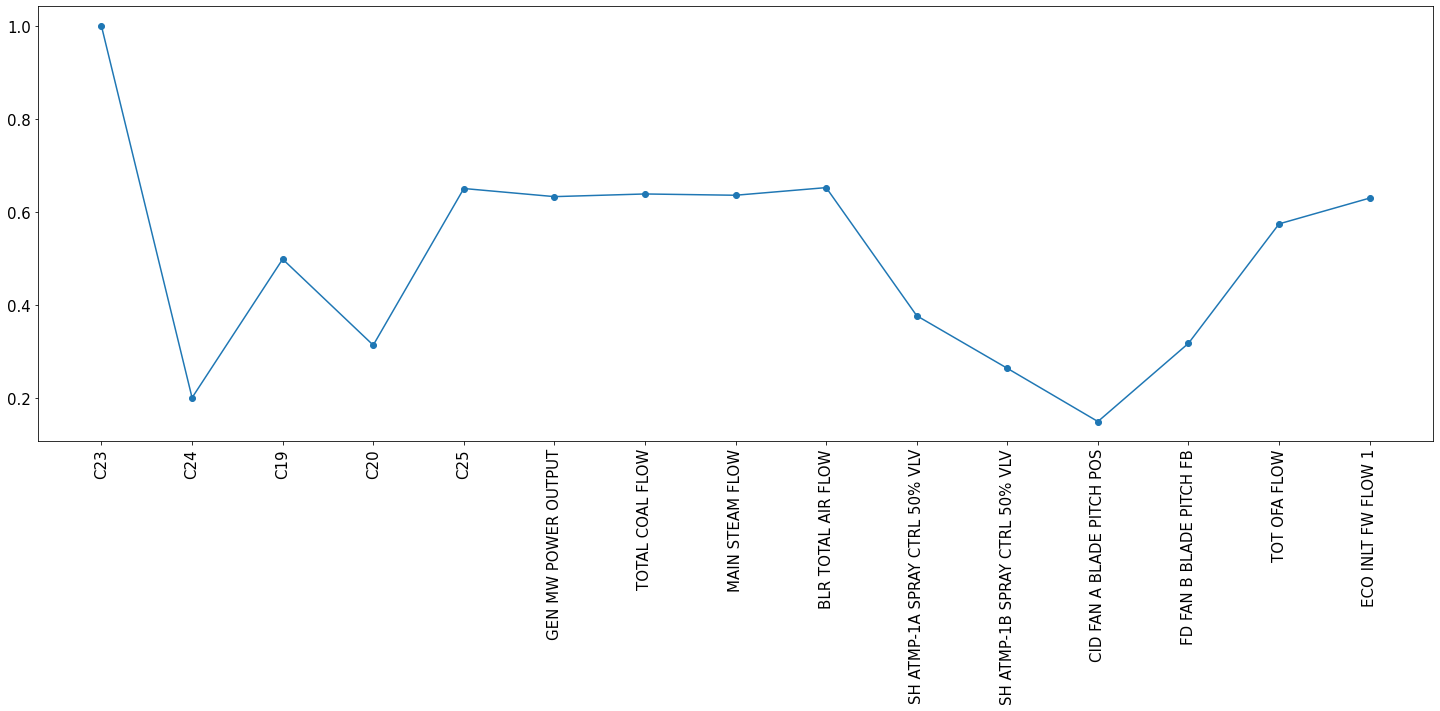

C23                              1.000000
C24                              0.200658
C19                              0.498816
C20                              0.313753
C25                              0.650765
GEN MW POWER OUTPUT              0.633302
TOTAL COAL FLOW                  0.639026
MAIN STEAM FLOW                  0.636273
BLR TOTAL AIR FLOW               0.652704
SH ATMP-1A SPRAY CTRL 50% VLV    0.377041
SH ATMP-1B SPRAY CTRL 50% VLV    0.263908
CID FAN A BLADE PITCH POS        0.149435
FD FAN B BLADE PITCH FB          0.317765
TOT OFA FLOW                     0.574691
ECO INLT FW FLOW 1               0.630172
Name: C23, dtype: float64


In [11]:
mpl.rcParams['figure.figsize'] = (25, 8)
plt.rc('xtick', labelsize=15)  

df_scaled_corr=df_scaled.corr()
corr = df_scaled_corr.abs()
corr_C23 = corr.loc[:, 'C23']
plt.plot(corr_C23, marker="o")
plt.xticks(rotation=90)
plt.show()
print(corr_C23)

In [12]:
#plot 설정
mpl.rcParams['figure.figsize'] = (12, 8)
mpl.rcParams['axes.grid'] = False
plt.rc('font', size=20)        # 기본 폰트 크기
plt.rc('axes', labelsize=15)   # x,y축 label 폰트 크기
plt.rc('xtick', labelsize=15)  # x축 눈금 폰트 크기 
plt.rc('ytick', labelsize=15)  # y축 눈금 폰트 크기
plt.rc('legend', fontsize=15)  # 범례 폰트 크기
plt.rc('figure', titlesize=20) #제목

# 원도우 생성

-timesteps: 예측에 사용되는 과거 데이터 개수

-n_future: 예측하고자하는 데이터 개수

-과거 100개(timesteps)의 데이터를 가지고 앞으로의 1개(n_future) 데이터를 예측

-train : test = 70% : 30%

In [13]:
import numpy as np
df_scaled=np.array(df_scaled)

X = []
Y = []
n_future = 1 
timesteps = 100
for i in range(timesteps, len(df_scaled) - n_future +1):
  X.append(df_scaled[i - timesteps:i, 0:df_scaled.shape[1]]) 
  Y.append(df_scaled[i + n_future - 1:i + n_future, 0])
X, Y = np.array(X), np.array(Y)

X_len = len(X)
Y_len = len(Y)
trainX = X[0:int(X_len*0.7)]
trainY = Y[0:int(Y_len*0.7)]
testX = X[int(X_len*0.7):]
testY = Y[int(Y_len*0.7):]
test_len = len(testY)

print('X shape: ', X.shape)        
print('Y shape: ', Y.shape)        
print('trainX shape: ', trainX.shape) 
print('trainY shape: ', trainY.shape)
print('testX shape: ', testX.shape)  
print('testY shape: ', testY.shape)  

X shape:  (2732, 100, 15)
Y shape:  (2732, 1)
trainX shape:  (1912, 100, 15)
trainY shape:  (1912, 1)
testX shape:  (820, 100, 15)
testY shape:  (820, 1)


# **Convolutional Bi-LSTM Model**

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 100, 15)]    0           []                               
                                                                                                  
 conv1d (Conv1D)                (None, 86, 32)       7232        ['input_1[0][0]']                
                                                                                                  
 activation (Activation)        (None, 86, 32)       0           ['conv1d[0][0]']                 
                                                                                                  
 max_pooling1d (MaxPooling1D)   (None, 43, 32)       0           ['activation[0][0]']             
                                                                                              

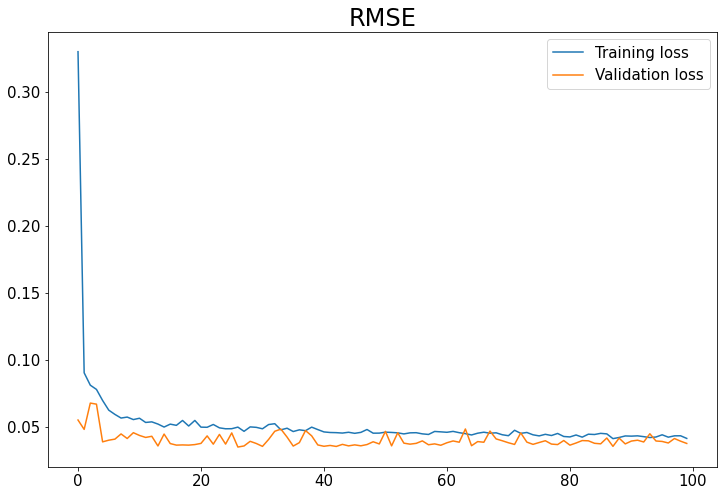

In [14]:
import tensorflow as tf
from tensorflow.keras.layers import LSTM, Bidirectional, Conv1D, MaxPooling1D, Activation, Flatten, Dense, Dropout, concatenate
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.callbacks import EarlyStopping
from keras import backend as K

input_layer1 = tf.keras.layers.Input(trainX.shape[1:])

conv1 = Conv1D(filters=32, kernel_size=15, strides=1)(input_layer1)
conv1 = Activation(activation='relu')(conv1)
conv1 = MaxPooling1D(pool_size=2, strides=2)(conv1)

conv2 = Conv1D(filters=64, kernel_size=3, strides=5)(conv1)
conv2 = Activation(activation='relu')(conv2)
conv2 = MaxPooling1D(pool_size=2, strides=2)(conv2)
conv2 = Dropout(0.3)(conv2)

flt = Flatten()(conv2)
lstm1 = Bidirectional(LSTM(64, activation='tanh', return_sequences=True))(input_layer1)
lstm2 = Bidirectional(LSTM(32, activation='tanh', return_sequences=False))(lstm1)
lstm2 = Dropout(0.2)(lstm2)
flt2 = Flatten()(lstm2)

concat = concatenate([flt,flt2])

dense2 = Dense(50,activation='relu')(concat)
out = Dense(trainY.shape[1])(dense2)

model = tf.keras.models.Model(inputs=input_layer1, outputs=out)

model.summary()


opt1 = Adam(learning_rate = 0.01, decay = 1e-7, beta_1=0.9, beta_2=0.999, epsilon=None,amsgrad=False) 
            #학습률 / 학습률의 감소율 / beta_1(기본설정값) / beta_2(기본설정값) / epsilon(기본설정값) / amsgrad(기본설정값)
opt2 = SGD(learning_rate = 0.01, decay = 1e-7, momentum = 0.9, nesterov = False)
            #학습률 / 학습률의 감소율 / 경사강하법에 관성 부여하여 로컬 미니멈에 도달했을 때 탈출하도록 / 모멘텀작동여부
opt3 = RMSprop(learning_rate=0.01, decay = 1e-7, rho=0.9, epsilon=None)
                #학습률 / 학습률의 감소율 / rho(기본설정값) / epsilon(기본설정값) 
    
#모델 compiling
def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true)))
    
model.compile(loss = root_mean_squared_error, optimizer=opt1) #RMSE오차 / opt1 / 정확도

#epoch stop 설정(epoch가 너무 많으면 오버피팅되고, 너무 적으면 언더피팅되므로)
earlystop = EarlyStopping(monitor='val_loss', patience=10, mode='auto') 
#validation data의 오차 모니터링 / 성능이 증가하지 않는 epoch 10번 허용 / validation data의 오차를 최소화 시킬지 최대화 시킬지 자동으로 선택

#모델 fitting
history = model.fit(trainX, trainY, epochs=100, batch_size=32, validation_split=0.1, verbose=1)

#오차 그래프
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title("RMSE")
plt.legend()

(0.0, 0.2)

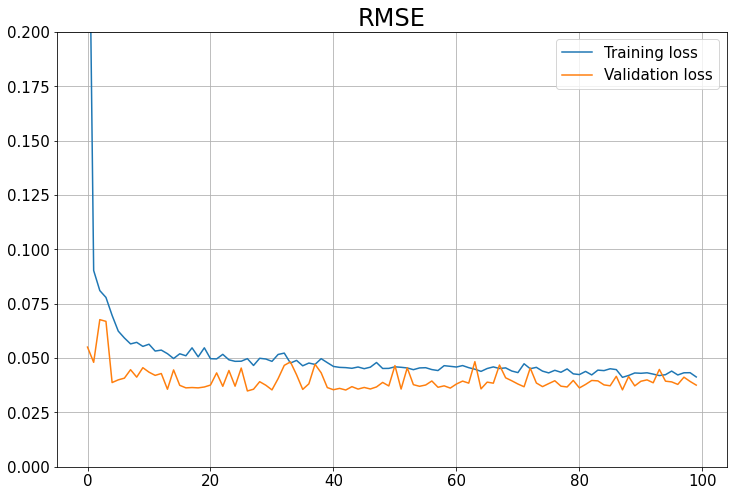

In [15]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title("RMSE")
plt.legend()
plt.grid(True)
plt.ylim(0,0.2)

In [16]:
val_loss = history.history['val_loss']
print('val_loss 최소값 Index: ', val_loss.index(min(val_loss)))
val_loss = pd.DataFrame(val_loss)
print('val_loss 최소값: ', val_loss.min())

val_loss 최소값 Index:  26
val_loss 최소값:  0    0.034877
dtype: float64


# **test, prediction 비교**

In [17]:
forecast = model.predict(testX)
forecast_copies = np.repeat(forecast, df_scaled.shape[1], axis=-1)

predicted_data = scaler.inverse_transform(forecast_copies)[:testX.shape[0]-1,0]

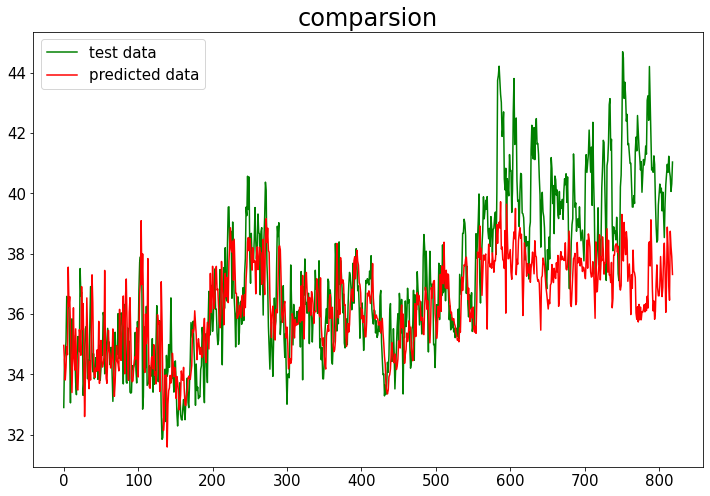

In [18]:
df = scaler.inverse_transform(df_scaled)

test_data = df[int(Y_len*0.7+(timesteps+n_future)):,0]

plt.plot(test_data, label='test data', color='g')

plt.plot(predicted_data, label='predicted data', color='r')
plt.title('comparsion')
plt.legend()

# **error 확인**

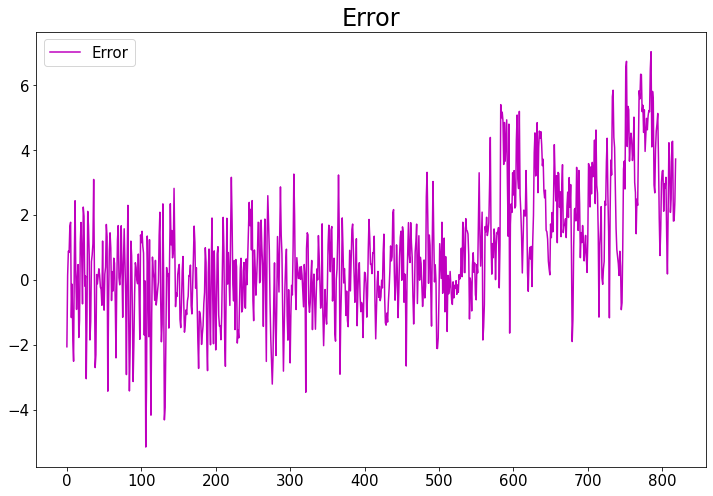

Total Error:  680.1298936214698
Max Error:  7.04124951705078


In [19]:
error = test_data-predicted_data
plt.plot(error, label='Error', color='m')
plt.title('Error')
plt.legend()
plt.show()

totalerror = sum(error)
print('Total Error: ', totalerror)
print('Max Error: ', error.max())

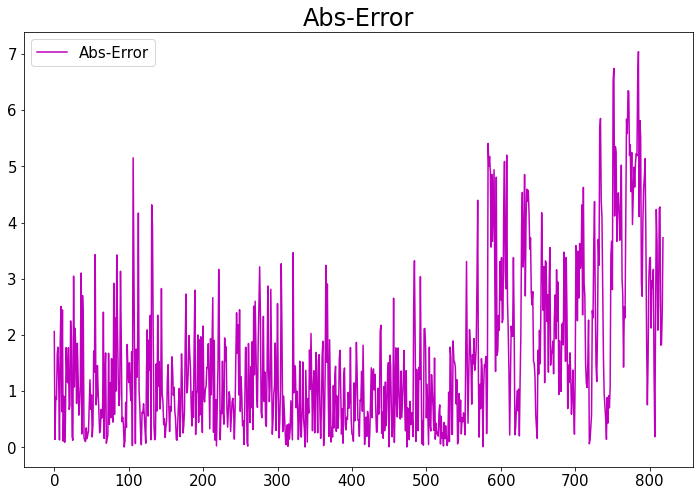

Total Abs-Error:  1275.4265232760986
Max Abs-Error:  7.04124951705078


In [20]:
abserror = abs(error)
plt.plot(abserror, label='Abs-Error', color='m')
plt.title('Abs-Error')
plt.legend()
plt.show()


totalabserror = sum(abserror)
print('Total Abs-Error: ', totalabserror)
print('Max Abs-Error: ', abserror.max())

## Test data의 MSE / RMSE / MAE / R-square

In [21]:
import math

MSE = sum(pow(error,2))/test_len
print("MSE=", MSE)

RMSE = math.sqrt(MSE)
print("RMSE=", RMSE)

MAE = sum(abs(error))/test_len
print("MAE=", MAE)

SSR = sum(pow((predicted_data-np.mean(test_data)), 2))
SST = sum(pow((test_data-np.mean(test_data)),2))
Rs=SSR/SST
print("R-square=", Rs)

MSE= 4.308185312853981
RMSE= 2.0756168511683413
MAE= 1.5553981991171935
R-square= 0.4168096589309558


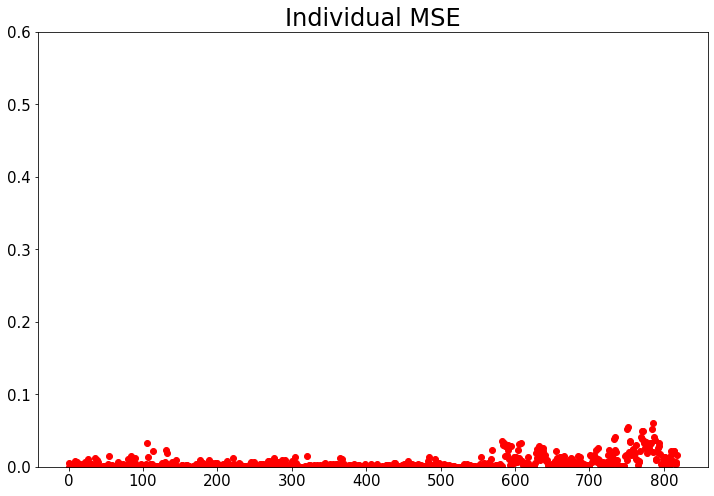

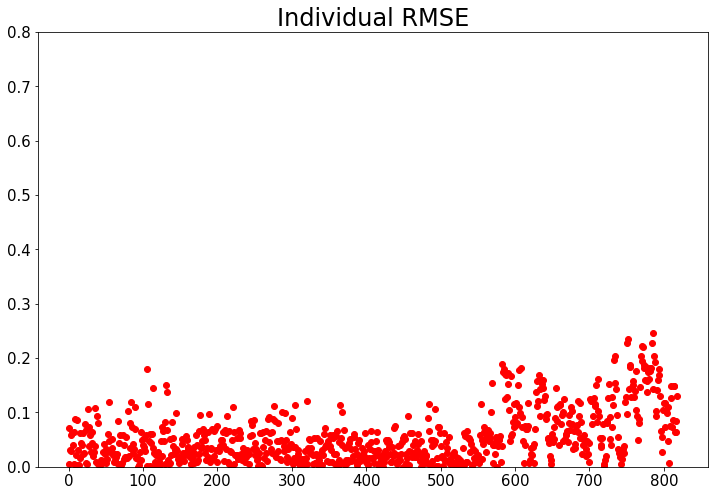

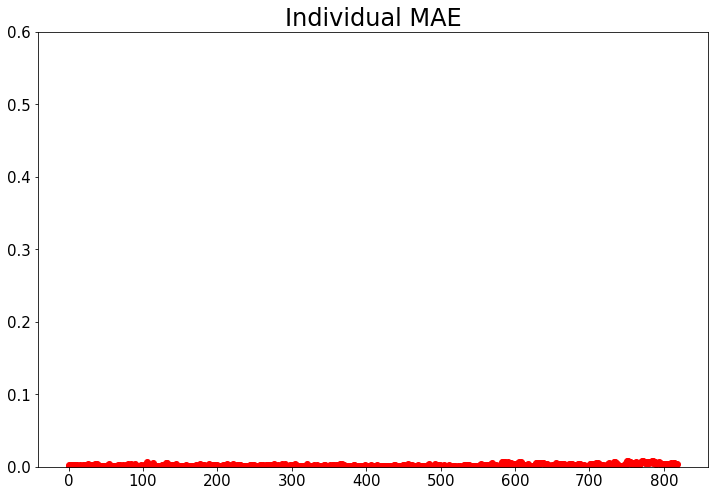

In [22]:
x=np.arange(test_len-1)
MSE_each = pow(error,2)/test_len
plt.scatter(x,MSE_each, color="r")
plt.title("Individual MSE")
plt.ylim(0,0.6)
plt.show()

RMSE_each = MSE_each**(1/2)
plt.scatter(x,RMSE_each, color="r")
plt.title("Individual RMSE")
plt.ylim(0,0.8)
plt.show()

MAE_each = abs(error)/test_len
plt.scatter(x,MAE_each, color="r")
plt.title("Individual MAE")
plt.ylim(0,0.6)
plt.show()

# **Train, Test, Prediction 확인**

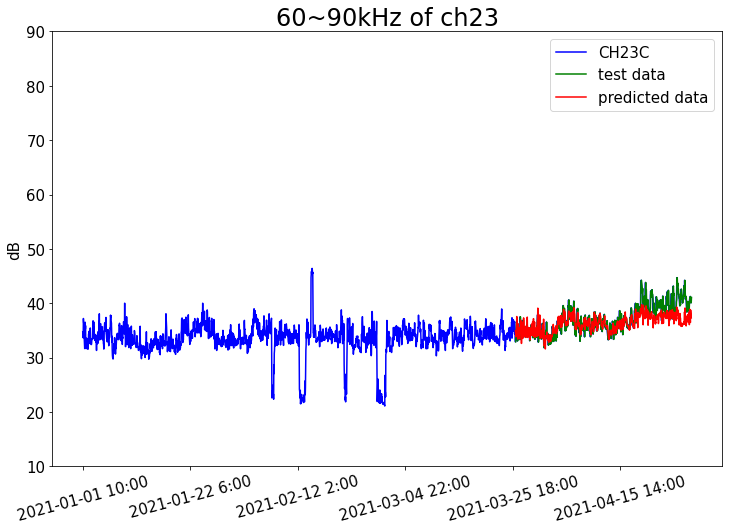

In [23]:
plt.plot(frequency, color='b', label='CH23C')

plt.plot(np.arange(trainX.shape[0]+timesteps+n_future+1,trainX.shape[0]+testX.shape[0]+timesteps+n_future), test_data, label='test data', color='g')

plt.plot(np.arange(trainX.shape[0]+timesteps+n_future,trainX.shape[0]+testX.shape[0]+timesteps), predicted_data, 'r', label='predicted data')

plt.title('60~90kHz of ch23')
plt.ylabel('dB')
plt.xticks([0,500,1000,1500,2000,2500])
plt.ylim(10,90)
plt.xticks(rotation=15)
plt.legend()
plt.show()

상관계수

In [ ]:
import seaborn as sns
df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns=['A23','A24','A19','A20','A25','GEN MW POWER OUTPUT','TOTAL COAL FLOW','MAIN STEAM FLOW','BLR TOTAL AIR FLOW',
                   'SH ATMP-1A SPRAY CTRL 50% VLV','SH ATMP-1B SPRAY CTRL 50% VLV','CID FAN A BLADE PITCH POS',
                   'FD FAN B BLADE PITCH FB','TOT OFA FLOW','ECO INLT FW FLOW 1'] #주파수에 따라 label 바꿔주기
df_scaled_corr=df_scaled.corr()
sns.set(font_scale=1)
sns.heatmap(df_scaled_corr.abs(), annot=True, cbar=False, linewidths=.5);
plt.show()

In [ ]:
model.save("LSTMmodel-A23.h5")
from tensorflow.keras.models import load_model
model = load_model("LSTMmodel-A23.h5")